<a href="https://colab.research.google.com/github/Flychuban/Kidney-Disease-Prediction/blob/main/KidneyDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
import keras as k

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KidneyDiseasePrediction/data/kidney_disease.csv')
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
# We are looking for null values cuz they harm to the data
pd.isnull(df).sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.shape

(400, 26)

We can see that data should be preprocessed and cleaned

In [13]:
# Clean the dataset from columns that are not need
columns_to_keep = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

df = df.drop([col for col in df.columns if not col in columns_to_keep], axis=1)

# Drop the values which are na or missing
df = df.dropna(axis=0)
df.head()
df.shape

(287, 7)

In [14]:
# Transform the non-numeric values in columns

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

df.head()

<ipython-input-14-2730d567469c>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-14-2730d567469c>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-14-2730d567469c>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [15]:
pd.isnull(df).sum()

sg                0
al                0
sc                0
hemo              0
pcv               0
htn               0
classification    0
dtype: int64

Now the data is preprocessed and cleaned from null values

In [16]:
Y = df['classification']
X = df.drop(['classification'], axis=1)

In [19]:
# We need to scale data values between 0 - 1 for better predictions
scaler = MinMaxScaler()
scaler.fit(X)
columns_names = X.columns
X[columns_names] = scaler.transform(X)

X.head()

,sg,al,sc,hemo,pcv,htn
0,0.75,0.2,0.033898,0.836735,0.717949,1.0
1,0.75,0.8,0.016949,0.557823,0.564103,0.0
2,0.25,0.4,0.059322,0.442177,0.384615,0.0
3,0.00,0.8,0.144068,0.551020,0.410256,1.0
4,0.25,0.4,0.042373,0.578231,0.487179,0.0


In [20]:
# split the data in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, shuffle=True, stratify=Y)

In [26]:
# Model structure
model = Sequential()

model.add(Dense(256, input_dim=len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='hard_sigmoid'))

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               1792      
                                                                 
 dense_9 (Dense)             (None, 16)                4112      
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5,921
Trainable params: 5,921
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Train the model
history = model.fit(X_train, Y_train, epochs=2000, batch_size=16)

Epoch 1/2000
15/15 [==============================] - 2s 2ms/step - loss: 0.6624 - accuracy: 0.8341
Epoch 2/2000
15/15 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.8952
Epoch 3/2000
15/15 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.9389
Epoch 4/2000
15/15 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.9345
Epoch 5/2000
15/15 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9258
Epoch 6/2000
15/15 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.9258
Epoch 7/2000
15/15 [==============================] - 0s 3ms/step - loss: 0.1385 - accuracy: 0.9258
Epoch 8/2000
15/15 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9520
Epoch 9/2000
15/15 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9520
Epoch 10/2000
15/15 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9607

In [30]:
# save the model
model.save("kidney_model")

Text(0.5, 0, 'Epoch')

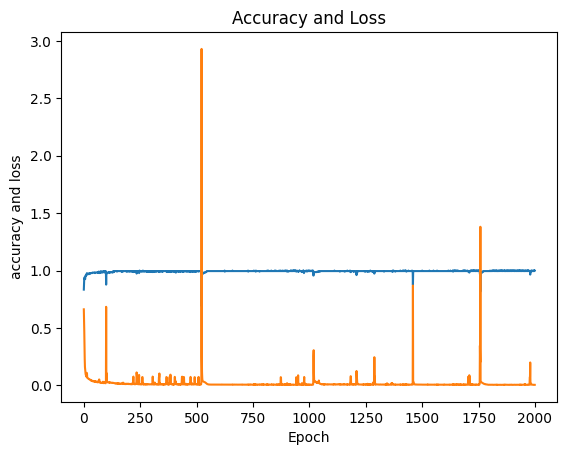

In [48]:
# Vizualize the training
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Accuracy and Loss")
plt.ylabel("accuracy and loss")
plt.xlabel("Epoch")

In [37]:
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
print(f"Model accuracy: {acc}")

2/2 [==============================] - 0s 4ms/step
Model accuracy: 1.0


In [43]:
del model

In [44]:
model = load_model('kidney_model.h5')

In [ ]:
model.predict(X_test)